In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs

In [3]:
data = make_blobs(n_samples=300,
    n_features=2,
    centers=2,
    cluster_std=1.0,random_state=101)

In [4]:
X,y = data

In [5]:
np.random.seed(seed=101)
z_noise = np.random.normal(size=len(X))
z_noise = pd.Series(z_noise)

In [6]:
feat = pd.DataFrame(X)
feat = pd.concat([feat,z_noise],axis=1)
feat.columns = ['X1','X2','X3']

In [7]:
feat.head()

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118


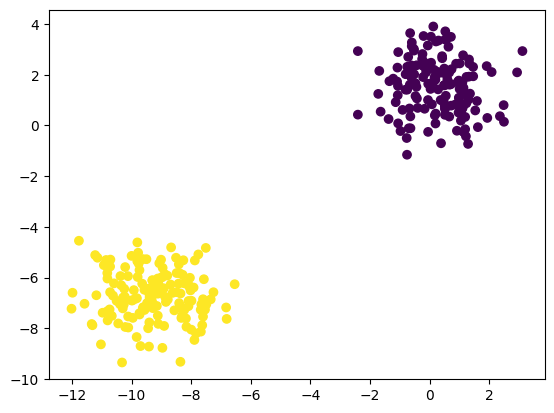

In [8]:
plt.scatter(feat['X1'],feat['X2'],c=y)

In [9]:
from mpl_toolkits.mplot3d import Axes3D

In [10]:
# %matplotlib notebook

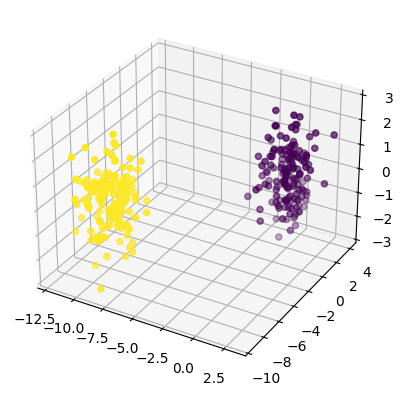

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feat['X1'],feat['X2'],feat['X3'],c=y)

# Encoder and Decoder

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [13]:
# 3 --> 2
encoder = Sequential()
encoder.add(Dense(units=2,activation='relu',input_shape=[3]))

In [14]:
# 2 ---> 3
decoder = Sequential()
decoder.add(Dense(units=3,activation='relu',input_shape=[2]))

In [15]:
# ENCODER
# 3 ---> 2 ----> 3
autoencoder = Sequential([encoder,decoder])
autoencoder.compile(loss="mse" ,optimizer=SGD(lr=1.5))

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
# Note how all the data is used! There is no "right" answer here
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(feat)

In [18]:
# scaled_data

In [19]:
autoencoder.fit(scaled_data,scaled_data,epochs=5)

Epoch 1/5
10/10 [==============================] - 4s 20ms/step - loss: 0.2858
Epoch 2/5
10/10 [==============================] - 0s 13ms/step - loss: 0.2783
Epoch 3/5
10/10 [==============================] - 0s 14ms/step - loss: 0.2720
Epoch 4/5
10/10 [==============================] - 0s 17ms/step - loss: 0.2667
Epoch 5/5
10/10 [==============================] - 0s 11ms/step - loss: 0.2624


In [20]:
encoded_2dim = encoder.predict(scaled_data)

10/10 [==============================] - 0s 9ms/step


In [21]:
encoded_2dim

array([[0.46835706, 1.0644844 ],
       [0.13381846, 0.66905445],
       [0.20297669, 0.7636893 ],
       [0.11997418, 0.46307456],
       [0.37584767, 0.75465226],
       [0.34864268, 0.65493363],
       [0.        , 0.18255067],
       [0.33628544, 0.7120782 ],
       [0.        , 0.20941739],
       [0.13103735, 0.6628396 ],
       [0.38776532, 0.787056  ],
       [0.30396235, 0.56812656],
       [0.11271325, 0.608106  ],
       [0.07724883, 0.31375623],
       [0.        , 0.16915631],
       [0.19654301, 0.6050944 ],
       [0.14276358, 0.6222575 ],
       [0.18618219, 0.8340316 ],
       [0.33425128, 1.0456517 ],
       [0.        , 0.4254672 ],
       [0.35276014, 0.70689994],
       [0.28315744, 0.9298647 ],
       [0.        , 0.23030275],
       [0.06044536, 0.24229373],
       [0.30252904, 0.5938019 ],
       [0.08201035, 0.57543373],
       [0.15693538, 0.64464086],
       [0.        , 0.32937965],
       [0.31217545, 0.707209  ],
       [0.31170377, 0.6330813 ],
       [0.

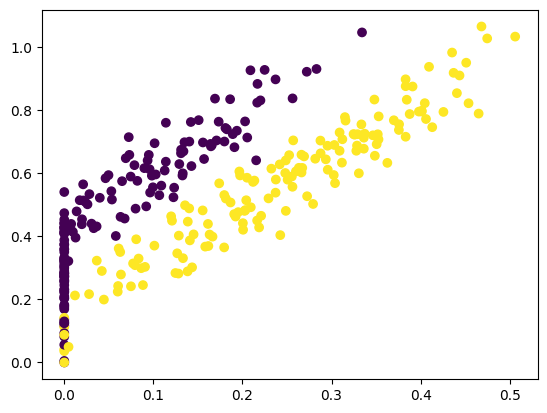

In [22]:
plt.scatter(encoded_2dim[:,0],encoded_2dim[:,1],c=y)